In [64]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Load Exp Zscore Matrix
HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()
ExpZ1Mat = pd.read_csv("dat/ExpMat/Energy.ExpZ1.csv", index_col=0)
ExpZ2Mat = pd.read_csv("dat/ExpMat/Energy.ExpZ2.csv", index_col=0)
allen_mouse_genes = loadgenelist("../dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")
graph = LoadConnectome2()

In [51]:
graph2 = LoadConnectome2("../dat/allen-mouse-conn/adj_mat_cartesian_distal.csv")

# Spark Meta 61 Genes complementary Test

In [14]:
SparkZ2Bias = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv", index_col="STR")
Sib2Bias = pd.read_csv("dat/bias2/ASD.Siblings.z2.csv", index_col="STR")

In [7]:
Spark_61_Matcch = pd.read_csv("dat/bias2/Spark_Meta_EWS.Matches.csv", index_col=0)
#Spark_61_Matcch.head(2)
SiblingDF = pd.read_csv("dat/ASD_Sibling_LGD_Mis.2.0.csv")

In [10]:
Spark_Genes = Spark_61_Matcch.index.values
Sibling_Genes = [int(GeneSymbol2Entrez[x]) for x in SiblingDF["HGNC"].values 
                 if x in GeneSymbol2Entrez]

In [203]:
#def ComplementarityTest(ExpMat, ASD, ASD_Indv, Sib, Sib_Indv):
#
topN = 50
Spark_CanSTRs = SparkZ2Bias.head(topN).index.values
Spark_Cohe ,_ = ScoreSTRSet(graph, Spark_CanSTRs, {})

In [204]:
# Get Spark Indv Genes Cohes
spark_indv_g_cohes = []
for g in Spark_Genes:
    if g in ExpZ2Mat.index.values:
        STR_Biases = ExpZ2Mat.loc[g, :].sort_values(ascending=False)
        g_top_STRs = STR_Biases.head(topN).index.values
        g_top_Cohe ,_ = ScoreSTRSet(graph, g_top_STRs, {})
        spark_indv_g_cohes.append(g_top_Cohe)

In [205]:
Sib_CanSTRs = Sib2Bias.head(topN).index.values
Sib_Cohe ,_ = ScoreSTRSet(graph, Sib_CanSTRs, {})

In [206]:
# Get Spark Indv Genes Cohes
sibling_indv_g_cohes = []
for g in Sibling_Genes:
    if g in ExpZ2Mat.index.values:
        STR_Biases = ExpZ2Mat.loc[g, :].sort_values(ascending=False)
        g_top_STRs = STR_Biases.head(topN).index.values
        g_top_Cohe ,_ = ScoreSTRSet(graph, g_top_STRs, {})
        sibling_indv_g_cohes.append(g_top_Cohe)

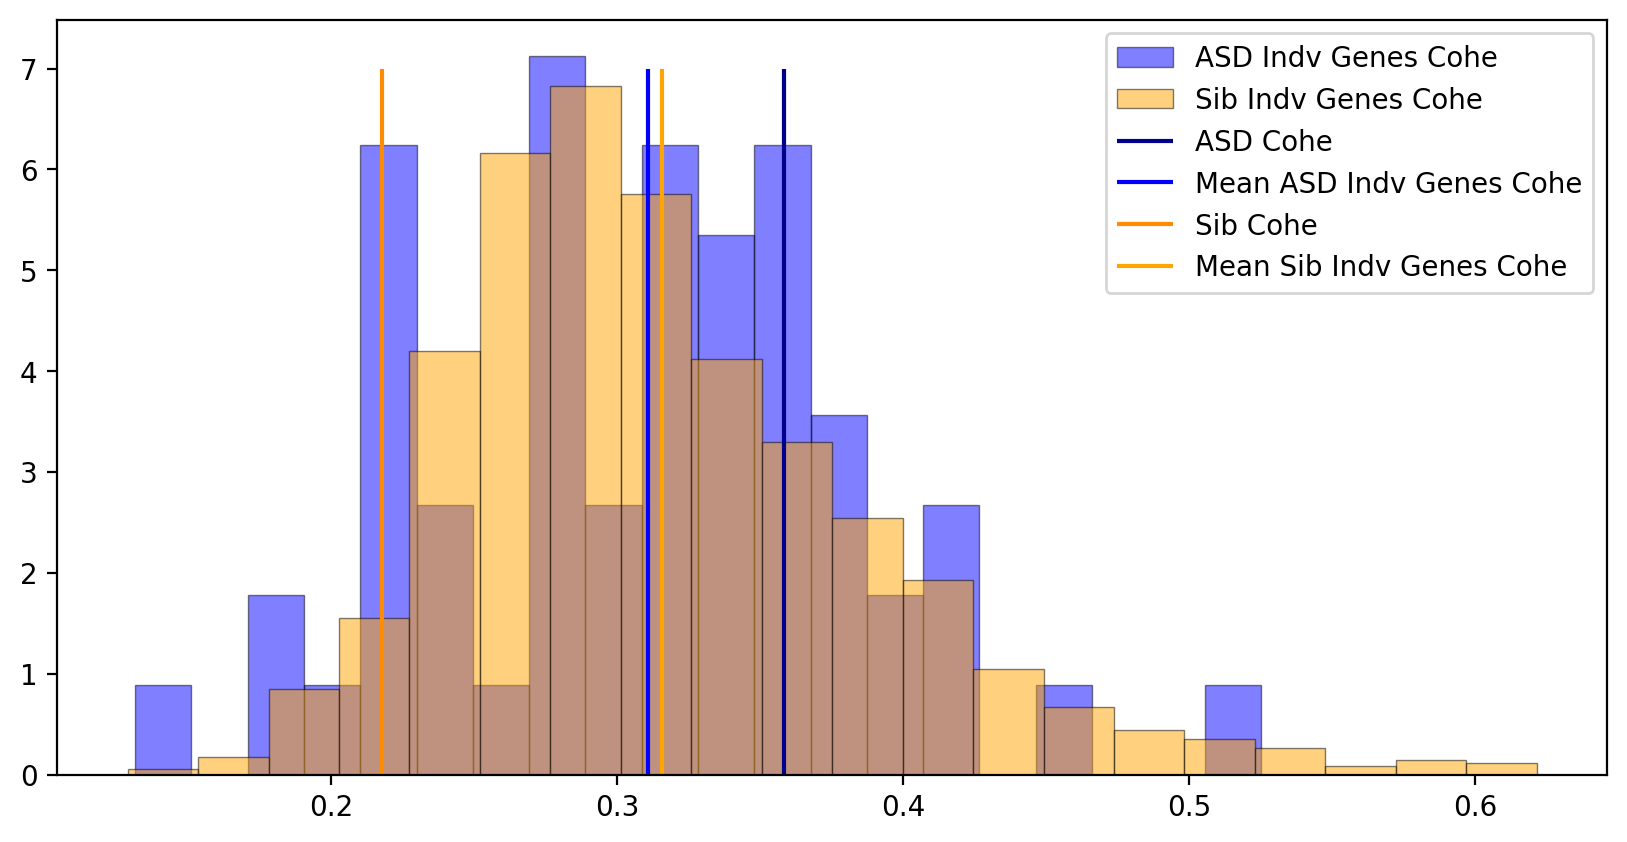

In [207]:
#np.mean(spark_indv_g_cohes)
ymax = 7

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))
ax.hist(spark_indv_g_cohes, density=1, bins=20, color="blue", label = "ASD Indv Genes Cohe", 
        edgecolor='black', alpha=0.5, linewidth=0.5)
ax.vlines(x=Spark_Cohe, ymin=0, ymax=ymax, color="darkblue", label="ASD Cohe")
ax.vlines(x=np.mean(spark_indv_g_cohes), ymin=0, ymax=ymax, color="blue", 
          label="Mean ASD Indv Genes Cohe")

ax.hist(sibling_indv_g_cohes, density=1, bins=20,  color="orange", label = "Sib Indv Genes Cohe", 
        edgecolor='black', alpha=0.5, linewidth=0.5)
ax.vlines(x=Sib_Cohe, ymin=0, ymax=ymax, color="darkorange", label="Sib Cohe")
ax.vlines(x=np.mean(sibling_indv_g_cohes), ymin=0, ymax=ymax, color="orange", 
          label="Mean Sib Indv Genes Cohe")

ax.legend()

In [208]:
Spark_Cohe2 ,_ = ScoreSTRSet(graph2, Spark_CanSTRs, {})
Sib_Cohe2 ,_ = ScoreSTRSet(graph2, Sib_CanSTRs, {})

spark_indv_g_cohes2 = []
for g in Spark_Genes:
    if g in ExpZ2Mat.index.values:
        STR_Biases = ExpZ2Mat.loc[g, :].sort_values(ascending=False)
        g_top_STRs = STR_Biases.head(topN).index.values
        g_top_Cohe ,_ = ScoreSTRSet(graph2, g_top_STRs, {})
        spark_indv_g_cohes2.append(g_top_Cohe)
        
sibling_indv_g_cohes2 = []
for g in Sibling_Genes:
    if g in ExpZ2Mat.index.values:
        STR_Biases = ExpZ2Mat.loc[g, :].sort_values(ascending=False)
        g_top_STRs = STR_Biases.head(topN).index.values
        g_top_Cohe ,_ = ScoreSTRSet(graph2, g_top_STRs, {})
        sibling_indv_g_cohes2.append(g_top_Cohe)

In [209]:
print(np.mean(spark_indv_g_cohes2), np.mean(sibling_indv_g_cohes2))

0.2355413889015974 0.23563506144552404


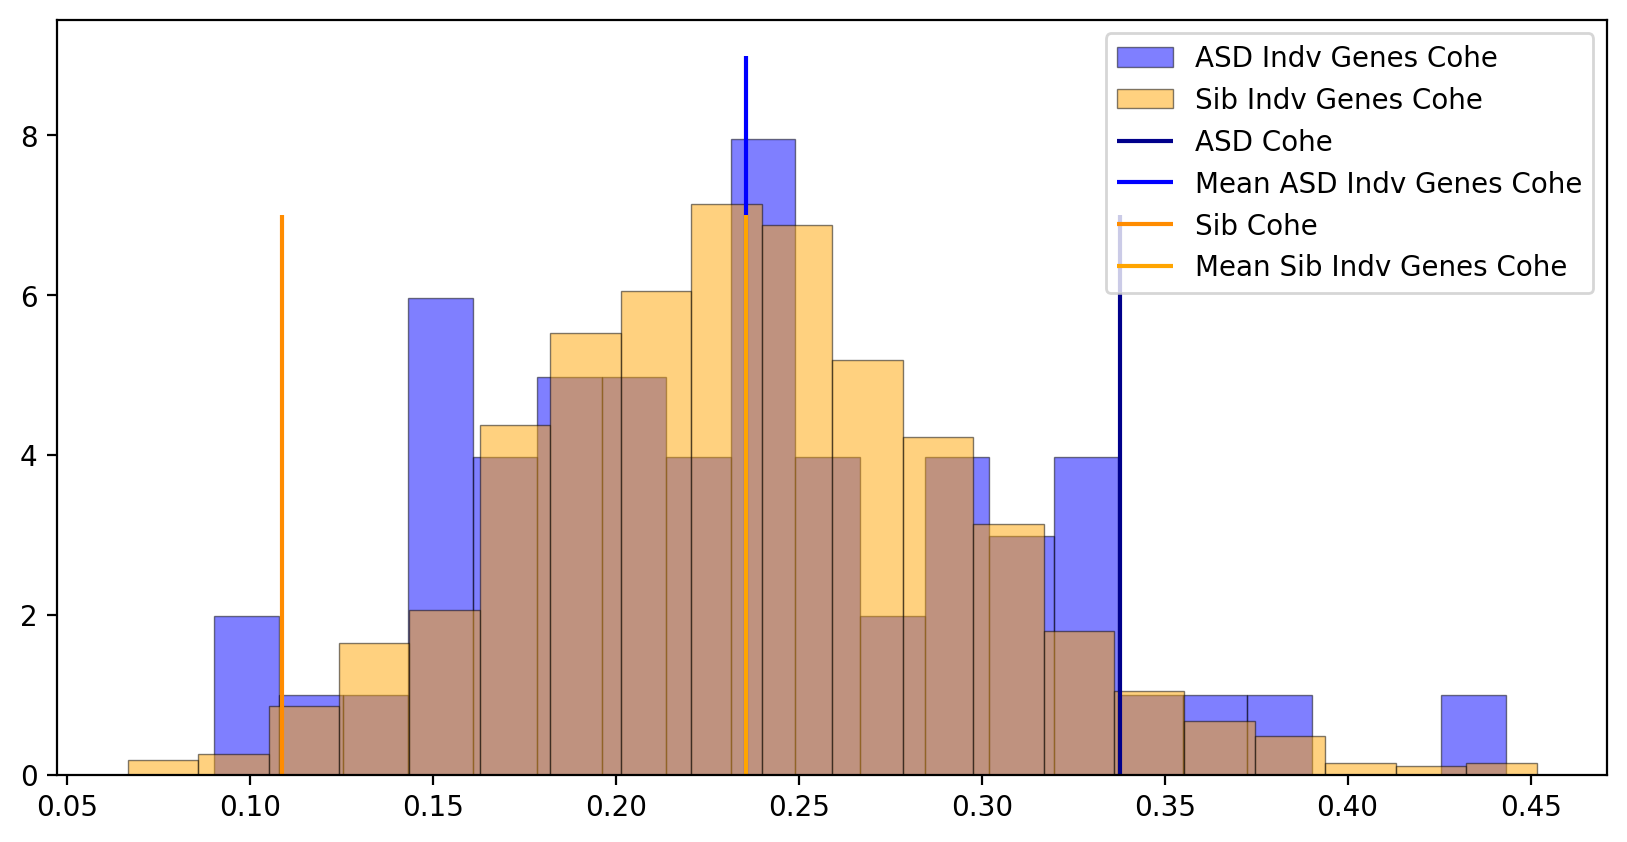

In [210]:
#np.mean(spark_indv_g_cohes)
ymax = 7

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))
ax.hist(spark_indv_g_cohes2, density=1, bins=20, color="blue", label = "ASD Indv Genes Cohe", 
        edgecolor='black', alpha=0.5, linewidth=0.5)
ax.vlines(x=Spark_Cohe2, ymin=0, ymax=ymax, color="darkblue", label="ASD Cohe")
ax.vlines(x=np.mean(spark_indv_g_cohes2), ymin=0, ymax=9, color="blue", 
          label="Mean ASD Indv Genes Cohe")

ax.hist(sibling_indv_g_cohes2, density=1, bins=20,  color="orange", label = "Sib Indv Genes Cohe", 
        edgecolor='black', alpha=0.5, linewidth=0.5)
ax.vlines(x=Sib_Cohe2, ymin=0, ymax=ymax, color="darkorange", label="Sib Cohe")
ax.vlines(x=np.mean(sibling_indv_g_cohes2), ymin=0, ymax=ymax, color="orange", 
          label="Mean Sib Indv Genes Cohe")

ax.legend()

In [211]:
# BootStrape Bars
Z2_Boot_Dir = "dat/Bootstrap_Match/asd.boot.bias.z2/"
ASD_Boot_Dir = Z2_Boot_Dir
ASD_Boot_Cohes, ASD_Boot_Cohes2 = [], []
ASD_Indv_Boot_Res = []
for i in np.arange(1,1000,1):
    df = pd.read_csv("{}/bootstrap.{}.csv".format(ASD_Boot_Dir,i), index_col="STR")
    g_top_STRs = df.head(topN).index.values
    Cohe ,_ = ScoreSTRSet(graph, g_top_STRs, {})
    Cohe2 ,_ = ScoreSTRSet(graph2, g_top_STRs, {})
    ASD_Boot_Cohes.append(Cohe)
    ASD_Boot_Cohes2.append(Cohe2)   
    
    boot_muts = pd.read_csv("{}/boot.muts.{}.csv".format(ASD_Boot_Dir,i))
    genes = list(set(bootstrapped_muts["HGNC"].values))
    genes = [GeneSymbol2Entrez[x] for x in genes if x in GeneSymbol2Entrez]
    indv_cohe = []
    for g in genes:
        if g in ExpZ2Mat.index.values:
            STR_Biases = ExpZ2Mat.loc[g, :].sort_values(ascending=False)
            g_top_STRs = STR_Biases.head(topN).index.values
            g_top_Cohe ,_ = ScoreSTRSet(graph, g_top_STRs, {})
            indv_cohe.append(g_top_Cohe)
    indv_cohe = np.array(indv_cohe)
    ASD_Indv_Boot_Res.append(np.mean(indv_cohe))
    
asd_all_mean = np.mean(ASD_Boot_Cohes)
asd_all_std = np.std(ASD_Boot_Cohes)

In [212]:
asd_all_mean2 = np.mean(ASD_Boot_Cohes2)
asd_all_std2 = np.std(ASD_Boot_Cohes2)

In [213]:
asd_indv_mean = np.mean(spark_indv_g_cohes)
asd_indv_std = np.std(spark_indv_g_cohes)
asd_indv_mean2 = np.mean(spark_indv_g_cohes2)
asd_indv_std2 = np.std(spark_indv_g_cohes2)

In [214]:
Z2_Boot_Dir = "dat/Bootstrap_Match/Sib.boot.Z2.bias/"
Sib_Boot_Dir = Z2_Boot_Dir
Sib_Boot_Cohes, Sib_Boot_Cohes2 = [], []
for i in np.arange(1,1000,1):
    df = pd.read_csv("{}/bootstrap.{}.csv".format(Sib_Boot_Dir,i), index_col="STR")
    g_top_STRs = df.head(topN).index.values
    Cohe ,_ = ScoreSTRSet(graph, g_top_STRs, {})
    Cohe2 ,_ = ScoreSTRSet(graph2, g_top_STRs, {})
    Sib_Boot_Cohes.append(Cohe)
    Sib_Boot_Cohes2.append(Cohe2)
    
sib_all_mean = np.mean(Sib_Boot_Cohes)
sib_all_std = np.std(Sib_Boot_Cohes)

In [215]:
sib_all_mean2 = np.mean(Sib_Boot_Cohes2)
sib_all_std2 = np.std(Sib_Boot_Cohes2)
sib_indv_mean = np.mean(sibling_indv_g_cohes)
sib_indv_std = np.std(sibling_indv_g_cohes)
sib_indv_mean2 = np.mean(sibling_indv_g_cohes2)
sib_indv_std2 = np.std(sibling_indv_g_cohes2)

In [216]:
Match_boot_Dir = "dat/Bootstrap_Match/asd.cont.bias.z2/"
Mat_Boot_Cohes, Mat_Boot_Cohes2 = [], []
for i in np.arange(1,1000,1):
    df = pd.read_csv("{}/cont.bias.{}.csv".format(Match_boot_Dir,i), index_col="STR")
    g_top_STRs = df.head(topN).index.values
    Cohe ,_ = ScoreSTRSet(graph, g_top_STRs, {})
    Cohe2 ,_ = ScoreSTRSet(graph2, g_top_STRs, {})
    Mat_Boot_Cohes.append(Cohe)
    Mat_Boot_Cohes2.append(Cohe2)

In [217]:
mat_all_mean = np.mean(Mat_Boot_Cohes)
mat_all_std = np.std(Mat_Boot_Cohes)
mat_all_mean2 = np.mean(Mat_Boot_Cohes2)
mat_all_std2 = np.std(Mat_Boot_Cohes2)

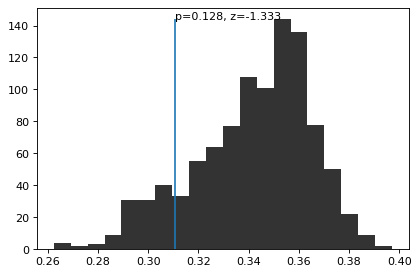

In [218]:
#plt.hist(ASD_Boot_Cohes, )
PlotPermutationP(ASD_Boot_Cohes, asd_indv_mean, gt=False)

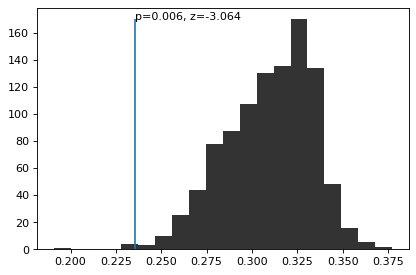

In [220]:
PlotPermutationP(ASD_Boot_Cohes2, asd_indv_mean2, gt=False)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


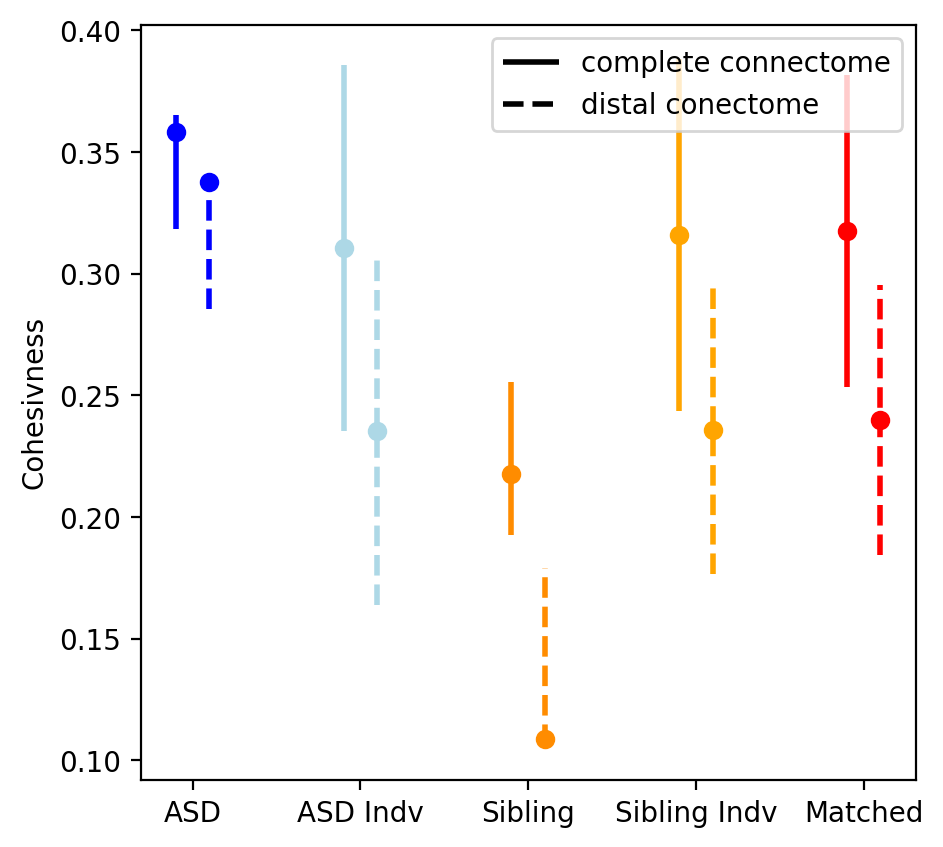

In [219]:
fig, ax = plt.subplots(dpi=200, figsize=(5, 5))
ax.scatter(0.9, Spark_Cohe, color="blue", marker="o")
ax.vlines(0.9, asd_all_mean-asd_all_std, asd_all_mean+asd_all_std, 
          color = "blue", lw=2)
ax.scatter(1.1, Spark_Cohe2, color="blue", marker="o", )
ax.vlines(1.1, asd_all_mean2-asd_all_std2, asd_all_mean2+asd_all_std2, 
          color = "blue", lw=2, ls="dashed")

ax.scatter(1.9, asd_indv_mean, color="lightblue", marker="o")
ax.vlines(1.9, asd_indv_mean-asd_indv_std, asd_indv_mean+asd_indv_std, 
          color = "lightblue", lw=2)
ax.scatter(2.1, asd_indv_mean2, color="lightblue", marker="o")
ax.vlines(2.1, asd_indv_mean2-asd_indv_std2, asd_indv_mean2+asd_indv_std2, 
          color = "lightblue", lw=2, ls="dashed")

ax.scatter(2.9, Sib_Cohe, color="darkorange", marker="o")
ax.vlines(2.9, sib_all_mean-sib_all_std, sib_all_mean+sib_all_std, 
          color = "darkorange", lw=2)
ax.scatter(3.1, Sib_Cohe2, color="darkorange", marker="o")
ax.vlines(3.1, sib_all_mean2-sib_all_std2, sib_all_mean2+sib_all_std2, 
          color = "darkorange", lw=2, ls="dashed")

ax.scatter(3.9, sib_indv_mean, color="orange", marker="o")
ax.vlines(3.9, sib_indv_mean-sib_indv_std, sib_indv_mean+sib_indv_std, 
          color = "orange", lw=2)
ax.scatter(4.1, sib_indv_mean2, color="orange", marker="o")
ax.vlines(4.1, sib_indv_mean2-sib_indv_std2, sib_indv_mean2+sib_indv_std2, 
          color = "orange", lw=2, ls="dashed")

ax.scatter(4.9, mat_all_mean, color="red", marker="o")
ax.vlines(4.9, mat_all_mean-mat_all_std, mat_all_mean+mat_all_std, 
          color = "red", lw=2)
ax.scatter(5.1, mat_all_mean2, color="red", marker="o")
ax.vlines(5.1, mat_all_mean2-mat_all_std2, mat_all_mean2+mat_all_std2, 
          color = "red", lw=2, ls="dashed")

#ax.grid(True)
ax.set_ylabel("Cohesivness")
ax.set_xticklabels(["", "ASD", "ASD Indv", "Sibling", "Sibling Indv", "Matched"])
ax.vlines(3.9, sib_indv_mean, sib_indv_mean, 
          color = "black", lw=2, label="complete connectome")
ax.vlines(4.1, sib_indv_mean2, sib_indv_mean2, 
          color = "black", lw=2, ls="dashed", label="distal conectome")
ax.legend()
plt.show()

# Old

In [6]:
# ASC
asc_zmatch = pd.read_csv("dat/bias/asd.asc.zmatch.rank.csv", index_col="STR")
asc_zmatch_top50_str = asc_zmatch.head(50).index.values
asc_zmatch_sg = pd.read_csv("dat/bias/asd.asc.zmatch.sg.csv")
asc_zmatch_sg = asc_zmatch_sg.set_index("STR")

In [7]:
p_bin = Agg_vs_Indv_gene_Binomial_Test_Cohesiveness(graph, asc_zmatch, asc_zmatch_sg)
print(p_bin)

(3.2391005589352804e-06, 0.20619235836627142, 0.16080710572913692)


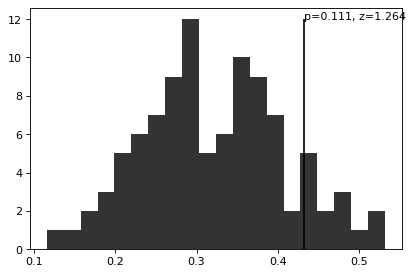

In [114]:
Agg_vs_Indv_gene_PermutationLikeCohesiveness(graph, asc_zmatch, asc_zmatch_sg)

In [8]:
asc_elevel = pd.read_csv("dat/bias/asc.explevel.rank.tsv", index_col="STR")
asc_elevel_top50_str = asc_elevel.head(50).index.values
asc_elevel_sg = pd.read_csv("dat/bias/asc.elevel.sg.csv")
asc_elevel_sg = asc_elevel_sg.set_index("STR")

In [9]:
p_bin = Agg_vs_Indv_gene_Binomial_Test_Cohesiveness(graph, asc_elevel, asc_elevel_sg)
print(p_bin)

(5.172916904175694e-10, 0.22294500295683028, 0.1646338483450043)


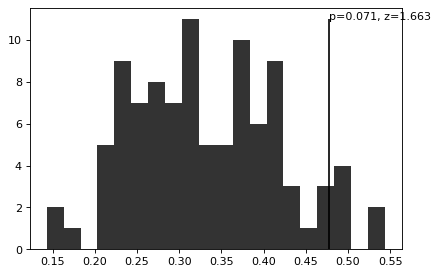

In [113]:
Agg_vs_Indv_gene_PermutationLikeCohesiveness(graph, asc_elevel, asc_elevel_sg)

In [10]:
# TADA 
tada_zmatch = pd.read_csv("dat/bias/asd.tada.zmatch.rank.csv", index_col="STR")
tada_zmatch_top50_str = tada_zmatch.head(50).index.values
tada_zmatch_sg = pd.read_csv("dat/bias/asd.tada.zmatch.sg.csv")
tada_zmatch_sg = tada_zmatch_sg.set_index("STR")

In [11]:
p_bin = Agg_vs_Indv_gene_Binomial_Test_Cohesiveness(graph, tada_zmatch, tada_zmatch_sg)
print(p_bin)

(2.5798951753619556e-05, 0.19803801348865727, 0.15872981869854258)


In [12]:
tada_elevel = pd.read_csv("dat/bias/tada.explevel.rank.tsv", index_col="STR")
tada_elevel_top50_str = tada_elevel.head(50).index.values
tada_elevel_sg = pd.read_csv("dat/bias/tada.elevel.sg.csv")
tada_elevel_sg = tada_elevel_sg.set_index("STR")

In [13]:
p_bin = Agg_vs_Indv_gene_Binomial_Test_Cohesiveness(graph, tada_elevel, tada_elevel_sg)
print(p_bin)

(0.02979969768917129, 0.1846932321315623, 0.1642346448133127)


In [14]:
# SPARK
spark_zmatch = pd.read_csv("dat/bias/asd.spark.zmatch.rank.csv", index_col="STR")
spark_zmatch_top50_str = asc_zmatch.head(50).index.values
spark_zmatch_sg = pd.read_csv("dat/bias/asd.spark.zmatch.sg.csv")
spark_zmatch_sg = spark_zmatch_sg.set_index("STR")

In [15]:
p_bin = Agg_vs_Indv_gene_Binomial_Test_Cohesiveness(graph, spark_zmatch, spark_zmatch_sg)
print(p_bin)

(0.3253513356683635, 0.14752851711026616, 0.1576819661750599)


In [16]:
spark_elevel = pd.read_csv("dat/bias/spark.explevel.rank.tsv", index_col="STR")
spark_elevel_top50_str = spark_elevel.head(50).index.values
spark_elevel_sg = pd.read_csv("dat/bias/spark.elevel.sg.csv")
spark_elevel_sg = spark_elevel_sg.set_index("STR")

In [105]:
p_bin = Agg_vs_Indv_gene_Binomial_Test_Cohesiveness(graph, spark_zmatch, spark_zmatch_sg)
print(p_bin)

(0.3253513356683635, 0.14752851711026616, 0.1576819661750599)


In [104]:
# SPARK tada
spark_elevel = pd.read_csv("dat/bias/sparktada.explevel.rank.tsv", index_col="STR")
spark_elevel_top50_str = spark_elevel.head(50).index.values
spark_elevel_sg = pd.read_csv("dat/bias/sparktada.elevel.sg.csv")
spark_elevel_sg = spark_elevel_sg.set_index("STR")

In [106]:
p_bin = Agg_vs_Indv_gene_Binomial_Test_Cohesiveness(graph, spark_elevel, spark_elevel_sg)
print(p_bin)

(2.0072539974113288e-05, 0.20608317815021726, 0.16543255505709625)


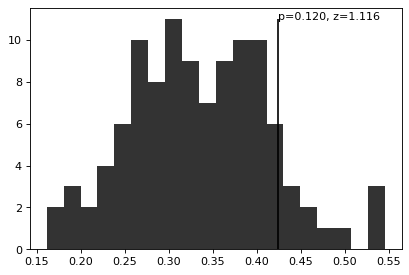

In [112]:
Agg_vs_Indv_gene_PermutationLikeCohesiveness(graph, spark_elevel, spark_elevel_sg)

In [18]:
# SIB
sib_zmatch = pd.read_csv("dat/bias/asd.sib.zmatch.rank.csv", index_col="STR")
sib_zmatch_top50_str = sib_zmatch.head(50).index.values
sib_zmatch_sg = pd.read_csv("dat/bias/asd.sib.zmatch.sg.csv")
sib_zmatch_sg = sib_zmatch_sg.set_index("STR")

In [19]:
p_bin = Agg_vs_Indv_gene_Binomial_Test_Cohesiveness(graph, sib_zmatch, sib_zmatch_sg)
print(p_bin)

(6.919622722886064e-07, 0.10373066424021839, 0.15572449401663077)


In [20]:
# SIB
sib_elevel = pd.read_csv("dat/bias/sib.explevel.rank.tsv", index_col="STR")
sib_elevel_top50_str = sib_elevel.head(50).index.values
sib_elevel_sg = pd.read_csv("dat/bias/sib.elevel.sg.csv")
sib_elevel_sg = sib_elevel_sg.set_index("STR")

In [21]:
p_bin = Agg_vs_Indv_gene_Binomial_Test_Cohesiveness(graph, sib_elevel, sib_elevel_sg)
print(p_bin)

(8.035549982748785e-28, 0.04520990312163617, 0.1600619153426757)


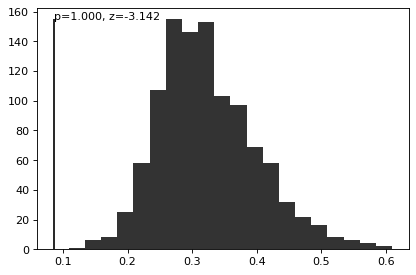

In [115]:
Agg_vs_Indv_gene_PermutationLikeCohesiveness(graph, sib_elevel, sib_elevel_sg)

### Compare ASC genes and sibling genes

In [31]:
asc_elevel_avg_top50_bias = []
asc_elevel_N_str_gt_1 = []
for c in asc_elevel_sg.columns.values:
    dat = asc_elevel_sg[c]
    top50 = dat.sort_values(ascending=False).index[:50]
    top50_bias = dat.sort_values(ascending=False).values[:50]
    asc_elevel_avg_top50_bias.append(np.mean(top50_bias))
    asc_elevel_N_str_gt_1.append(len([x for x in dat if x > 1]))

In [34]:
sib_elevel_avg_top50_bias = []
sib_elevel_N_str_gt_1 = []
for c in sib_elevel_sg.columns.values:
    dat = sib_elevel_sg[c]
    top50 = dat.sort_values(ascending=False).index[:50]
    top50_bias = dat.sort_values(ascending=False).values[:50]
    sib_elevel_avg_top50_bias.append(np.mean(top50_bias))
    sib_elevel_N_str_gt_1.append(len([x for x in dat if x > 1]))

1.0977701574825054 1.2145389974105323
MannwhitneyuResult(statistic=43474.0, pvalue=0.001997665849750269)


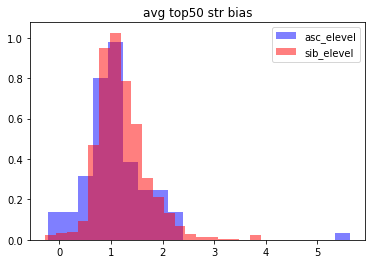

In [69]:
plt.hist(asc_elevel_avg_top50_bias, bins=20, color="blue", alpha=0.5, label="asc_elevel", density=1)
plt.hist(sib_elevel_avg_top50_bias, bins=20, color="red", alpha=0.5, label="sib_elevel", density=1)
print(np.mean(asc_elevel_avg_top50_bias), np.mean(sib_elevel_avg_top50_bias))
print(mannwhitneyu(asc_elevel_avg_top50_bias, sib_elevel_avg_top50_bias))
plt.legend()
plt.title("avg top50 str bias")
plt.show()

20.612244897959183 21.845724907063197
MannwhitneyuResult(statistic=48959.0, pvalue=0.12057050605952863)


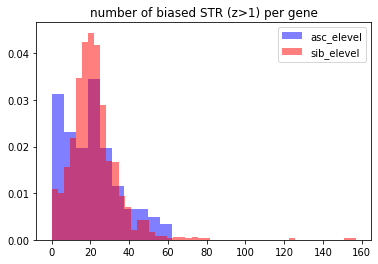

In [73]:
plt.hist(asc_elevel_N_str_gt_1, bins=10, density=1, color="blue", alpha=0.5, label="asc_elevel")
plt.hist(sib_elevel_N_str_gt_1, bins=50, density=1, color="red", alpha=0.5, label="sib_elevel")
print(np.mean(asc_elevel_N_str_gt_1), np.mean(sib_elevel_N_str_gt_1))
print(mannwhitneyu(asc_elevel_N_str_gt_1, sib_elevel_N_str_gt_1))
plt.legend()
plt.title("number of biased STR (z>1) per gene")
plt.show()

In [65]:
# pairwise correlation
asc_elevel_sg_pairwise_corr = []
for g1, g2 in itertools.combinations(asc_elevel_sg.columns.values, 2):
    #print(g1, g2)
    #break
    g1_top50_bias = asc_elevel_sg.loc[asc_elevel_top50_str, g1]
    g2_top50_bias = asc_elevel_sg.loc[asc_elevel_top50_str, g2]
    r = 0
    for x1, x2 in zip(g1_top50_bias, g2_top50_bias):
        if x1 > 0 and x2 > 0:
            r += 1
    #r, p = spearmanr(g1_top50_bias, g2_top50_bias)
    if r == r:
        asc_elevel_sg_pairwise_corr.append(r)

In [66]:
# pairwise correlation
sib_elevel_sg_pairwise_corr = []
for g1, g2 in itertools.combinations(sib_elevel_sg.columns.values[:100], 2):
    #print(g1, g2)
    #break
    g1_top50_bias = sib_elevel_sg.loc[sib_elevel_top50_str, g1]
    g2_top50_bias = sib_elevel_sg.loc[sib_elevel_top50_str, g2]
    #r, p = spearmanr(g1_top50_bias, g2_top50_bias)
    r = 0
    for x1, x2 in zip(g1_top50_bias, g2_top50_bias):
        if x1 > 0 and x2 > 0:
            r += 1
    if r == r:
        sib_elevel_sg_pairwise_corr.append(r)

11.440563854407742 7.094545454545455
MannwhitneyuResult(statistic=9047436.5, pvalue=6.669390043005259e-87)


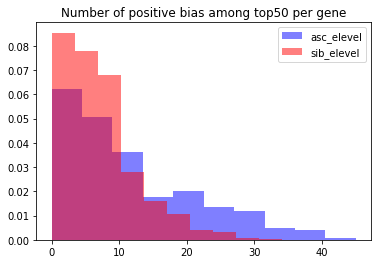

In [101]:
plt.hist(asc_elevel_sg_pairwise_corr, density=1, color="blue", alpha=0.5, label="asc_elevel")
plt.hist(sib_elevel_sg_pairwise_corr, density=1, color="red", alpha=0.5, label="sib_elevel")
print(np.mean(asc_elevel_sg_pairwise_corr), np.mean(sib_elevel_sg_pairwise_corr))
print(mannwhitneyu(asc_elevel_sg_pairwise_corr, sib_elevel_sg_pairwise_corr))
plt.title("Number of positive bias among top50 per gene")
plt.legend()
plt.show()

In [93]:
# N STR has positive bias among top50
asc_N_STR_Pos_bias_top50 = []
#MoreCommenSTRs = 
for g in asc_elevel_sg.columns.values:
    top50_bias = asc_elevel_sg.loc[:, g]
    asc_N_STR_Pos_bias_top50.append(len([x for x in top50_bias if x > 0]))

In [94]:
# N STR has positive bias among top50
sib_N_STR_Pos_bias_top50 = []
for g in sib_elevel_sg.columns.values:
    top50_bias = sib_elevel_sg.loc[:, g]
    sib_N_STR_Pos_bias_top50.append(len([x for x in top50_bias if x > 0]))

78.95918367346938 77.31691449814126
MannwhitneyuResult(statistic=46025.0, pvalue=0.018538088441973386)


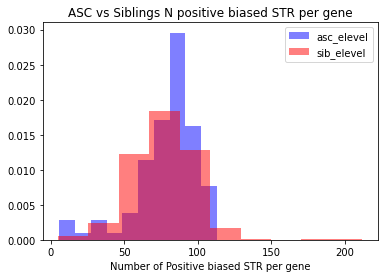

In [97]:
plt.hist(asc_N_STR_Pos_bias_top50, density=1, color="blue", alpha=0.5, label="asc_elevel")
plt.hist(sib_N_STR_Pos_bias_top50, density=1, color="red", alpha=0.5, label="sib_elevel")
print(np.mean(asc_N_STR_Pos_bias_top50), np.mean(sib_N_STR_Pos_bias_top50))
print(mannwhitneyu(asc_N_STR_Pos_bias_top50, sib_N_STR_Pos_bias_top50))
plt.legend()
plt.title("ASC vs Siblings N positive biased STR per gene")
plt.xlabel("Number of Positive biased STR per gene")
plt.show()

In [98]:
# N STR has positive bias among top50
asc_N_STR_Pos_bias_top50 = []
#MoreCommenSTRs = 
for g in asc_elevel_sg.columns.values:
    top50_bias = asc_elevel_sg.loc[asc_elevel_top50_str, g]
    asc_N_STR_Pos_bias_top50.append(len([x for x in top50_bias if x > 0]))

In [99]:
# N STR has positive bias among top50
sib_N_STR_Pos_bias_top50 = []
for g in sib_elevel_sg.columns.values:
    top50_bias = sib_elevel_sg.loc[sib_elevel_top50_str, g]
    sib_N_STR_Pos_bias_top50.append(len([x for x in top50_bias if x > 0]))

23.948979591836736 18.243494423791823
MannwhitneyuResult(statistic=39126.0, pvalue=1.144478133583476e-05)


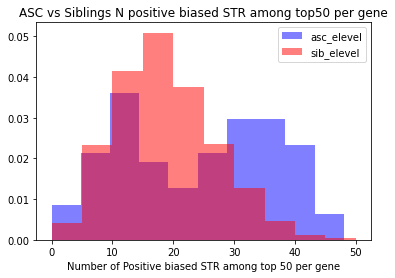

In [100]:
plt.hist(asc_N_STR_Pos_bias_top50, density=1, color="blue", alpha=0.5, label="asc_elevel")
plt.hist(sib_N_STR_Pos_bias_top50, density=1, color="red", alpha=0.5, label="sib_elevel")
print(np.mean(asc_N_STR_Pos_bias_top50), np.mean(sib_N_STR_Pos_bias_top50))
print(mannwhitneyu(asc_N_STR_Pos_bias_top50, sib_N_STR_Pos_bias_top50))
plt.legend()
plt.title("ASC vs Siblings N positive biased STR among top50 per gene")
plt.xlabel("Number of Positive biased STR among top 50 per gene")
plt.show()

In [91]:
# top bias vs avg bias
top_biases, N_bias_gt_1 = [], []
#MoreCommenSTRs = 
for g in asc_elevel_sg.columns.values:
    dat = asc_elevel_sg.loc[:, g]
    dat = asc_elevel_sg.loc[asc_elevel_top50_str, g]
    #top_biases.append(max(dat))
    top_biases.append(np.mean([x for x in dat if x > 1]))
    N_bias_gt_1.append(len([x for x in dat if x > 1]))

/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'N biased STR (z>1)')

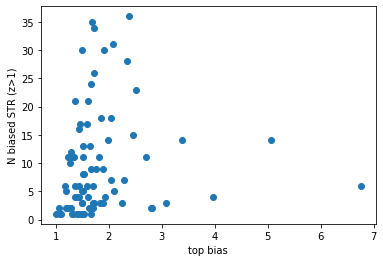

In [92]:
plt.scatter(top_biases, N_bias_gt_1)
plt.xlabel("top bias")
plt.ylabel("N biased STR (z>1)")

In [120]:
str2reg = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/structure2region.map", delimiter="\t")
str2reg = str2reg.sort_values("REG")

In [121]:
str2reg.head(2)

,STR,REG
171,Interposed_nucleus,Cerebellum
205,Paraflocculus,Cerebellum


In [128]:
#str2reg[str2reg["REG"]=="Thalamus"]

In [ ]:
for spark in 